## Observations and Insights 

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combine_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [95]:
# Checking the number of mice.
mice_count = len(combine_df)
mice_count

1893

In [96]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combine_df.duplicated(subset=['Mouse ID','Timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [97]:
# Optional: Get all the data for the duplicate mouse ID.


In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [99]:
# Checking the number of mice in the clean DataFrame.
clean_data.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Group data by Drug Regimen
grouped_data = clean_data.groupby('Drug Regimen')
#Create summary table using describe function
summarystats = grouped_data['Tumor Volume (mm3)'].describe()
#Define sem and create SEM column in summary table
sem = grouped_data['Tumor Volume (mm3)'].sem()
summarystats['SEM'] = sem
summarystats
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,count,mean,std,min,25%,50%,75%,max,SEM
Drug Regimen,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421,0.525862
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111


## Bar and Pie Charts

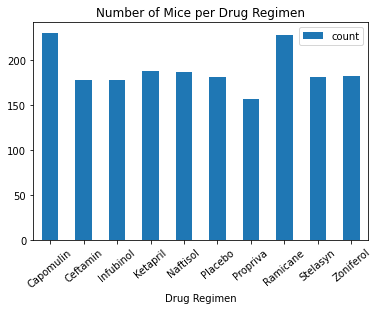

In [143]:
# # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
summarystats.plot(kind='bar', y=['count'], x=None, title='Number of Mice per Drug Regimen', rot=40)


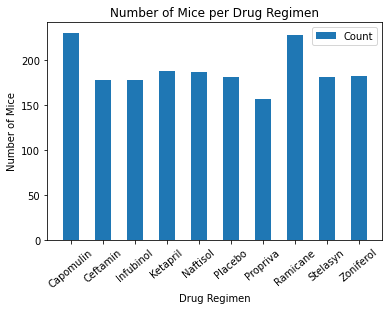

In [144]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_byregimen = summarystats['count']
label='Count'
plt.bar(mice_byregimen.index.values, mice_byregimen.values, width=0.5, label=label)
#create title and labels
plt.xticks(rotation=40)
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.legend(loc='best')


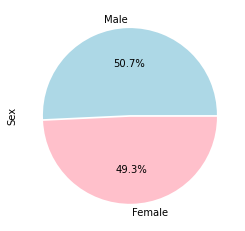

In [103]:
# # Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_data.Sex.value_counts()
gender_group
explode = (0, 0.02)
labels = ['Female', 'Male']
colors = ['lightblue', 'pink']
gender_group.plot(kind='pie', y=(gender_group.values), colors=colors, explode=explode, autopct='%1.1f%%')

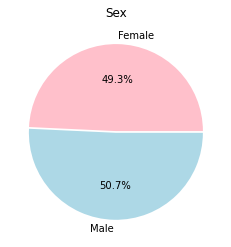

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = clean_data.groupby('Sex')
mice_bygender = gender_group['Mouse ID'].count()
labels = ['Female', 'Male']
explode = (0, .02)
colors = ('pink', 'lightblue')
plt.pie(mice_bygender, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = clean_data[clean_data['Drug Regimen'].isin(drugs)]
# Start by getting the last (greatest) timepoint for each mouse
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
         Last_Tumor_Size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_data, four_last_tumor, on='Mouse ID')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last_Tumor_Size
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,62.754
810,z581,Infubinol,Female,24,25,30,56.286750,2,62.754
811,z581,Infubinol,Female,24,25,35,58.628399,3,62.754
812,z581,Infubinol,Female,24,25,40,60.053740,3,62.754


In [106]:
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)

In [107]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_tumor_grouped = merged_df.groupby('Drug Regimen')
last_tumor_data = last_tumor_grouped['Last_Tumor_Size']
last_tumor_data.value_counts()
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs: 
    quartiles = four_last_tumor_unstack[drug].quantile([0.25, 0.5, 0.75])
    lquartile = quartiles[0.25]
    uquartile = quartiles[0.75]
    iqr = uquartile - lquartile 
    upbound = uquartile + 1.5 * iqr
    lobound = lquartile - 1.5 * iqr
    
    
    print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lquartile}")
    print(f"The upper quartile of {drug} is: {uquartile}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lobound} for {drug} could be outliers.")
    print(f"Values above {upbound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    for drug in drugs:
        tumor_vol_data.append(list(four_last_tumor_unstack[drug].dropna()))
    # Determine outliers using upper and lower bounds
    

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.377
The upper quartile of Capomulin is: 40.159
The interquartile range of Capomulin is: 7.7819999999999965
The the median of Capomulin is: 38.125 
Values below 20.704000000000008 for Capomulin could be outliers.
Values above 51.831999999999994 for Capomulin could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.659
The interquartile range of Ramicane is: 9.099
The the median of Ramicane is: 36.562 
Values below 17.911499999999997 for Ramicane could be outliers.
Values above 54.3075 for Ramicane could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.049
The

([<matplotlib.axis.XTick at 0x7fbe126b9978>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

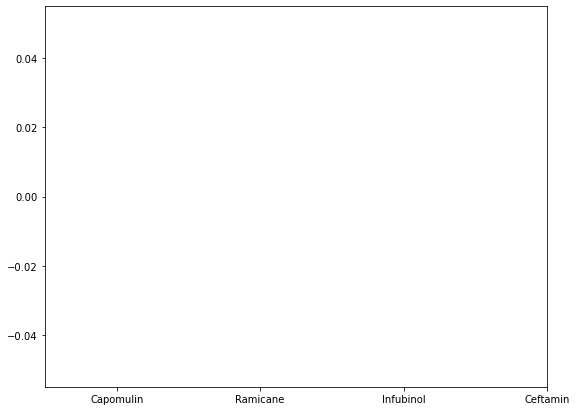

In [125]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_data = []
plt.subplots(figsize=(9,7))

plt.boxplot(tumor_vol_data)
plt.xticks([1,2,3,4],drugs)


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume Over Time with Capomulin')

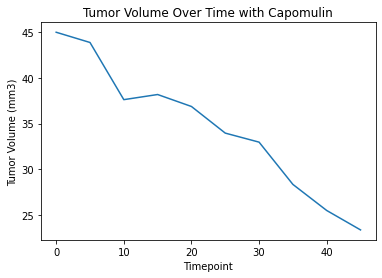

In [122]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
cap_data_mouse = cap_data.loc[cap_data['Mouse ID'] == 's185']
                  
plt.plot(cap_data_mouse['Timepoint'], cap_data_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Over Time with Capomulin')
                    

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  


Text(0.5, 1.0, 'Average Tumor Volume vs. Weight with Capomulin')

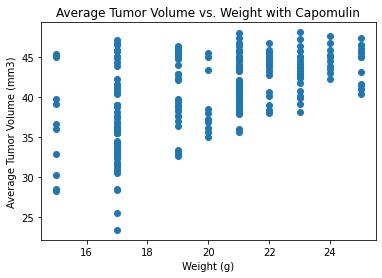

In [141]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
print(cap_data.head())

plt.scatter(cap_data['Weight (g)'], cap_data['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Average Tumor Volume vs. Weight with Capomulin')


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
